# Shikari King

## Research question/interests
How do different factors contributing to happiness, such as income, social support, freedom, and corruption, vary across different regions in the world, and how do these regional differences affect overall levels of happiness and life satisfaction?

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import geopandas as gpd
import geoplot as gplt

In [37]:
Data2015 = pd.read_csv('../data/processed/2015_Clean_Data.csv')
Data2016 = pd.read_csv('../data/processed/2016_Clean_Data.csv')
Data2017 = pd.read_csv('../data/processed/2017_Clean_Data.csv')
Data2018 = pd.read_csv('../data/processed/2018_Clean_Data.csv')
Data2019 = pd.read_csv('../data/processed/2019_Clean_Data.csv')
Data2020 = pd.read_csv('../data/processed/2020_Clean_Data.csv')
Data2021 = pd.read_csv('../data/processed/2021_Clean_Data.csv')
Data2022 = pd.read_csv('../data/processed/2022_Clean_Data.csv')
DataCombine = pd.read_csv('../data/processed/Overall(No-Year)_Clean_Data.csv')
DataAllYears = pd.read_csv('../data/processed/Overall(With-year)_Clean_Data.csv')

datasets = [Data2015, Data2016, Data2017, Data2018, Data2019, Data2020, Data2021, Data2022, DataCombine, DataAllYears]
for data in datasets:
    data['Country'] = data['Country'].replace('United States', 'United States of America')

Data2016

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


# Pipeline

- Creating Economy vs Region Plot
- Happiness by region chart
- World map showing all of this

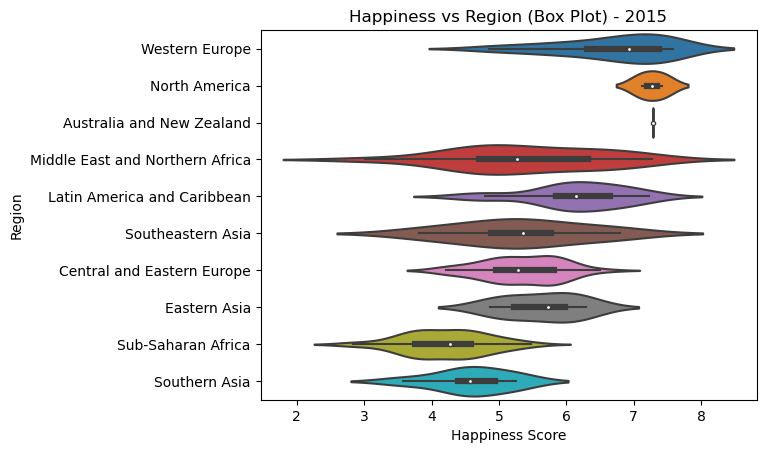

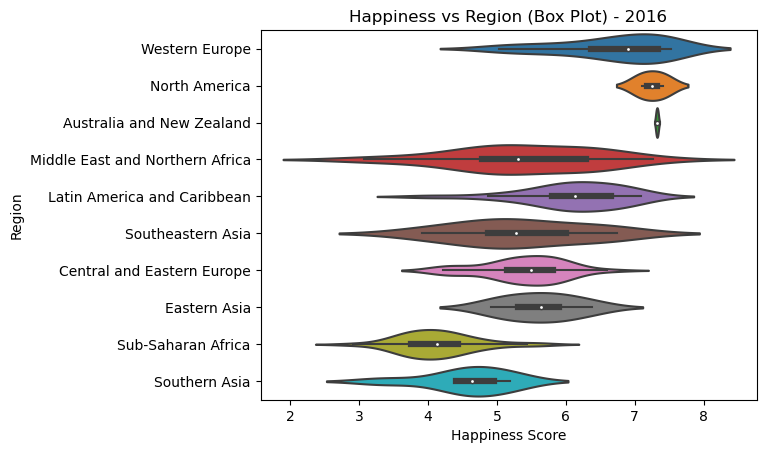

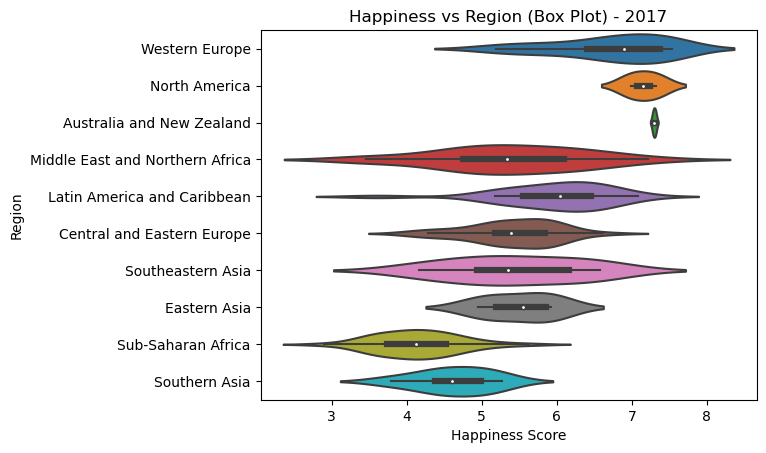

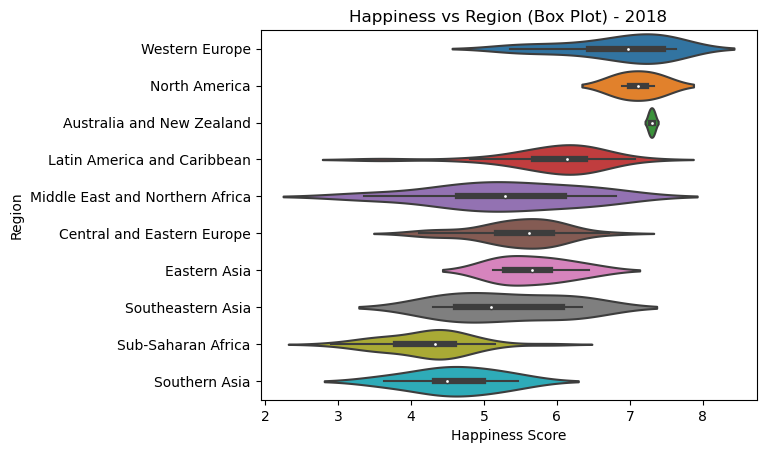

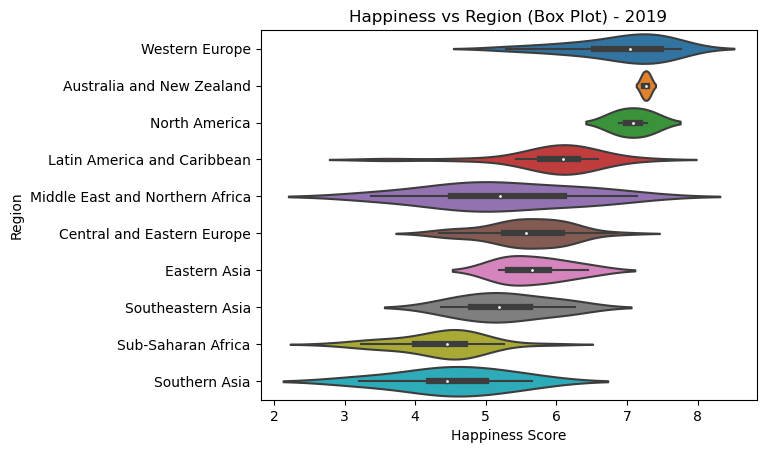

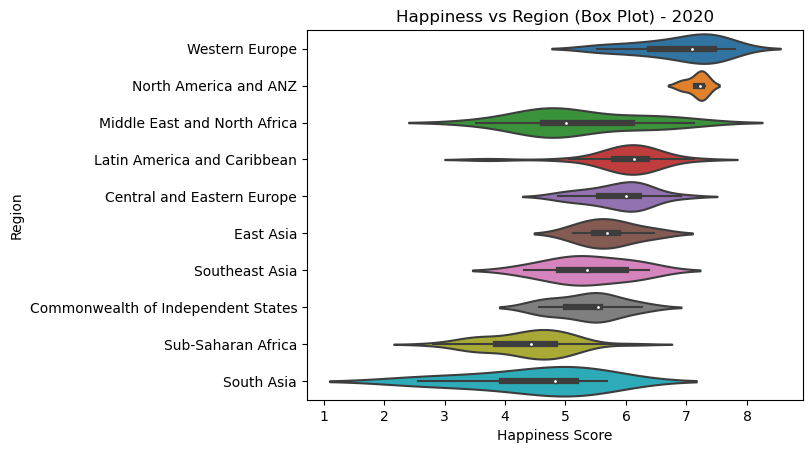

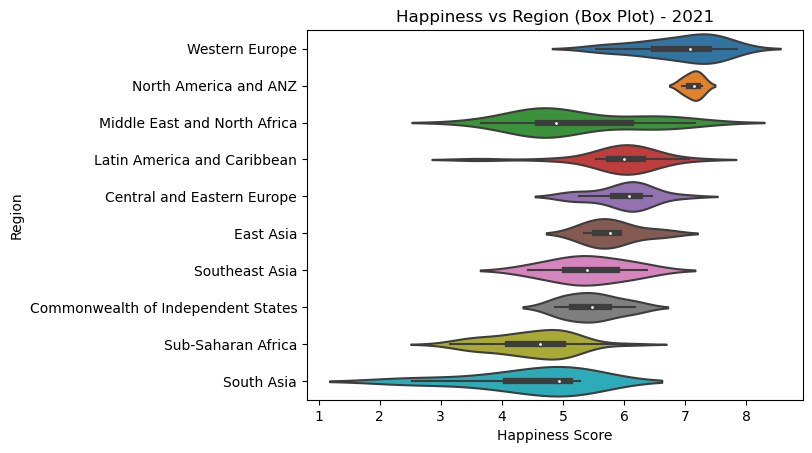

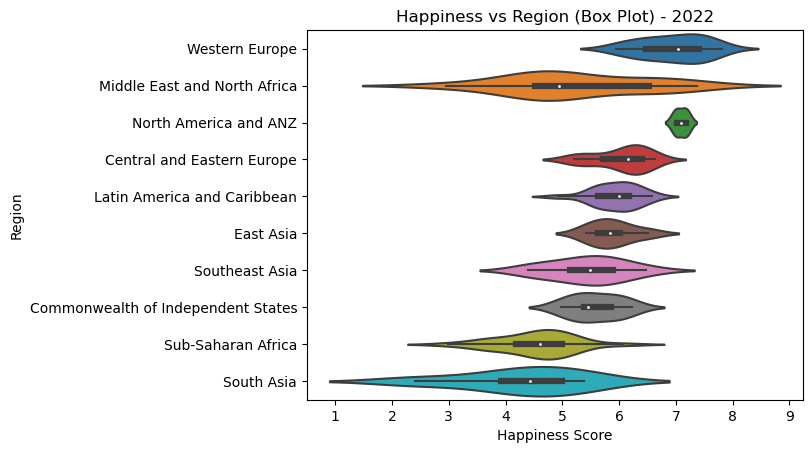

In [40]:
datasets = [(Data2015,'Happiness vs Region (Box Plot) - 2015'),
            (Data2016,'Happiness vs Region (Box Plot) - 2016'),
            (Data2017,'Happiness vs Region (Box Plot) - 2017'),
            (Data2018,'Happiness vs Region (Box Plot) - 2018'), 
            (Data2019,'Happiness vs Region (Box Plot) - 2019'),
            (Data2020,'Happiness vs Region (Box Plot) - 2020'),
            (Data2021,'Happiness vs Region (Box Plot) - 2021'),
            (Data2022,'Happiness vs Region (Box Plot) - 2022')]

for dataset, title in datasets:
    sns.violinplot(x='Happiness Score', y='Region', data=dataset, scale='width')
    plt.title(title)
    plt.ylabel('Region')
    plt.xlabel('Happiness Score')
    plt.show()

### Looking at the charts above we can clearly observe that the happiest regions are Western Europe as well as North America and they have consistenly been the happiest country.

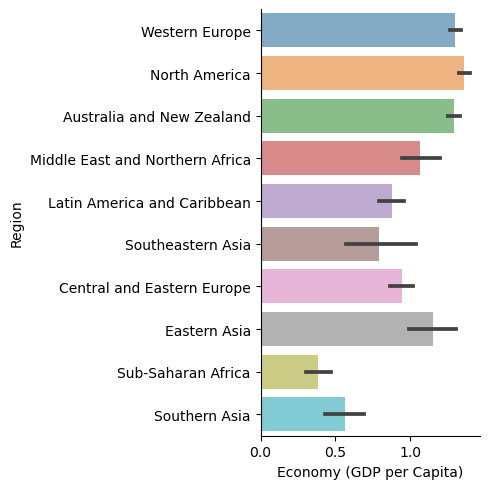

In [8]:
data = Data2015
sns.catplot(x='Economy (GDP per Capita)', y='Region', data=data, kind="bar", alpha=.6)
plt.show()

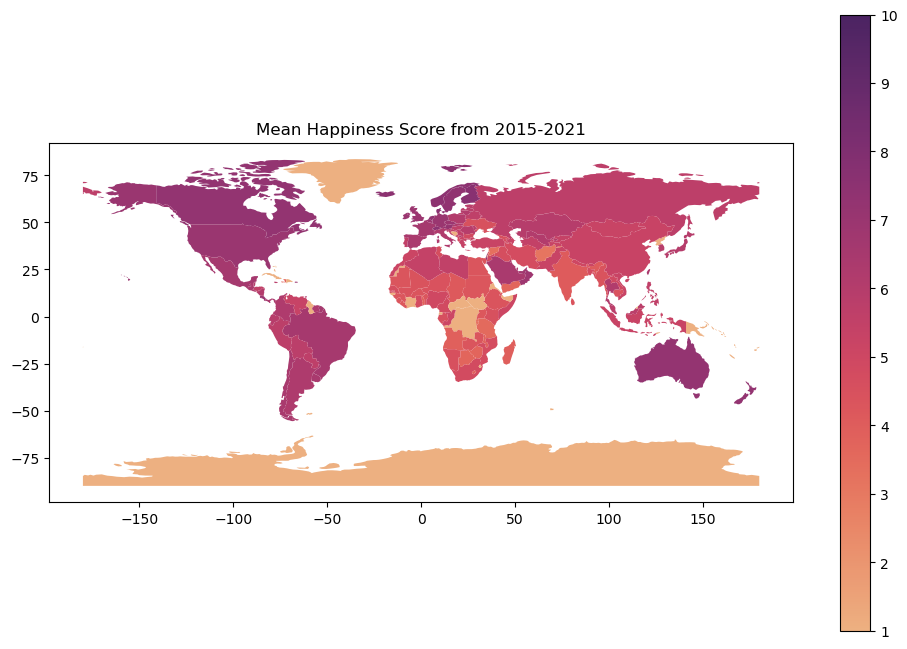

In [36]:
# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert the projection of the world map to WGS84
world = world.to_crs(epsg=4326)
data = DataAllYears.groupby('Country')['Happiness Score'].mean().reset_index()

#had to change the country name
data['Country'] = data['Country'].replace('United States', 'United States of America')

data.rename(columns={'Country': 'name'}, inplace=True)

# Merge the Happiness data with the world map data
world_data = world.merge(data, on='name', how='left')

world_data['Happiness Score'].fillna(0, inplace=True)

world_data['Happiness Score'] = world_data['Happiness Score'].map(data.set_index('name')['Happiness Score'])

# Merge the Happiness data with the world map data
world_data = world.merge(data, on='name', how='left')

world_data['Happiness Score'].fillna(0, inplace=True)

# Create the heatmap on the world map
fig, ax = plt.subplots(figsize=(12, 8))
world_data.plot(column='Happiness Score', cmap='flare', legend=True, ax=ax, vmin=1, vmax=10)
ax.set_title('Mean Happiness Score from 2015-2021')
plt.show()

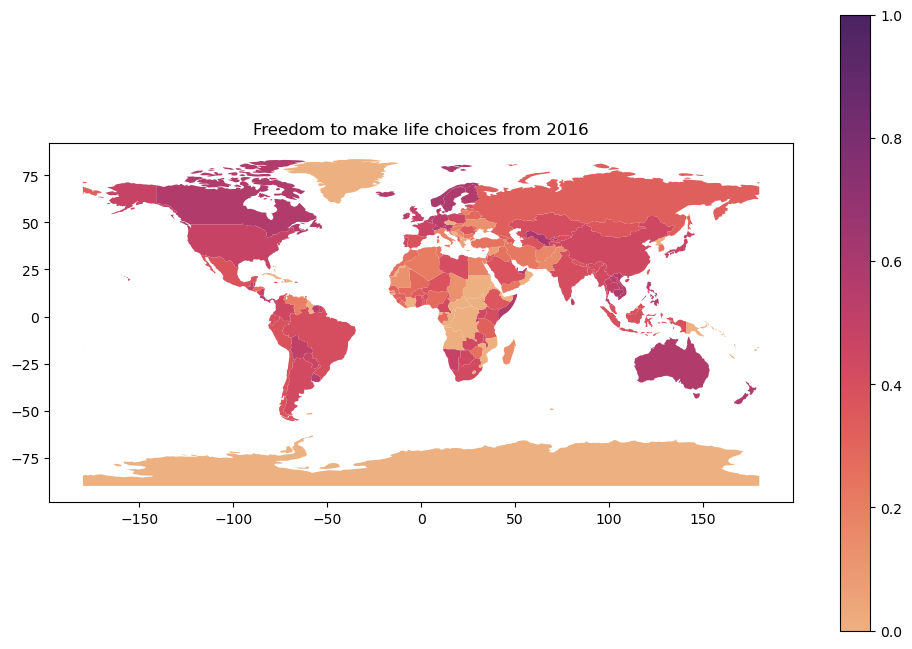

In [43]:
# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert the projection of the world map to WGS84
world = world.to_crs(epsg=4326)
data = Data2016.groupby('Country')['Freedom to make life choices'].mean().reset_index()

data.rename(columns={'Country': 'name'}, inplace=True)

# Merge the Happiness data with the world map data
world_data = world.merge(data, on='name', how='left')

world_data['Freedom to make life choices'] = world_data['Freedom to make life choices'].map(data.set_index('name')['Freedom to make life choices'])

# Merge the Happiness data with the world map data
world_data = world.merge(data, on='name', how='left')

world_data['Freedom to make life choices'].fillna(0, inplace=True)

# Create the heatmap on the world map
fig, ax = plt.subplots(figsize=(12, 8))
world_data.plot(column='Freedom to make life choices', cmap='flare', legend=True, ax=ax, vmin=0, vmax=1)
ax.set_title('Freedom to make life choices from 2016')
plt.show()

/Users/shikariking/miniconda3/lib/python3.10/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


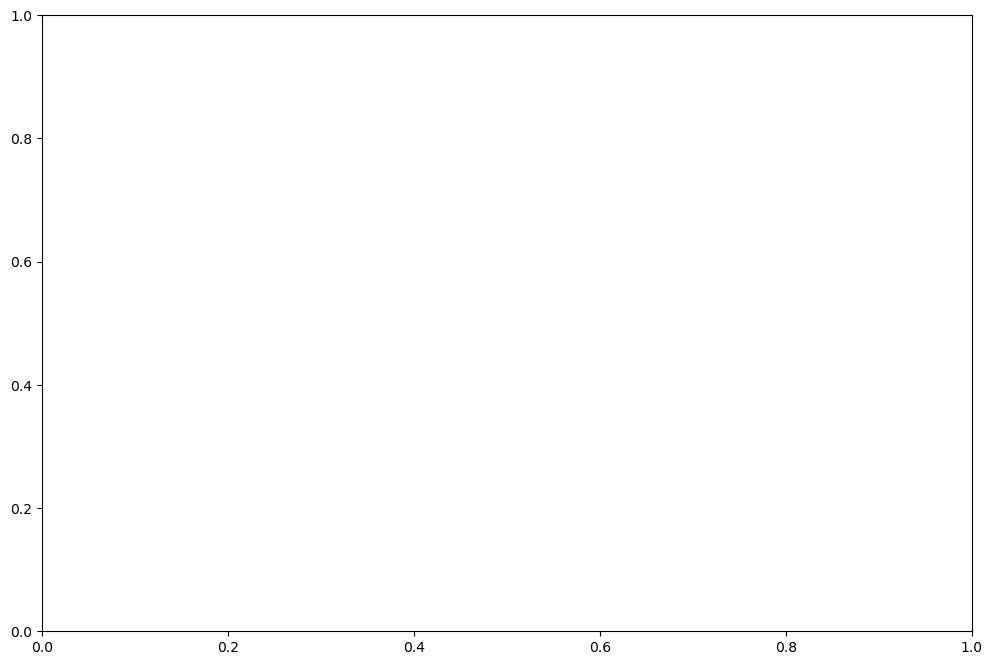

In [49]:
# Define the function to update the plot for each year
def update_plot(year):
    # Get the data for the current year
    data = DataAllYears[DataAllYears['year'] == year].groupby('Country')['Happiness Score'].mean().reset_index()
    data.rename(columns={'Country': 'name'}, inplace=True)
    
    # Merge the data with the world map data
    world_data = world.merge(data, on='name', how='left')
    world_data['Happiness Score'].fillna(0, inplace=True)
    
    # Plot the data on the world map
    world_data.plot(column='Happiness Score', cmap='flare', legend=True, ax=ax, vmin=1, vmax=10)
    ax.set_title('Mean Happiness Score in {}'.format(year))
    
    # Return the plot
    return ax

# Set up the initial plot
fig, ax = plt.subplots(figsize=(12, 8))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.to_crs(epsg=4326)

# Set up the animation
ani = animation.FuncAnimation(fig, update_plot, frames=range(2015, 2022), repeat=True)

# Show the animation
plt.show()